First few rows of the dataset:
    age  gender        income    education  married  children           city  \
0   45    Male  61271.953359       Master    False         3    Lake Sheila   
1   24  Female  53229.101074  High School    False         1   Crystalburgh   
2   45  Female  30066.046684     Bachelor     True         3  Margaretburgh   
3   19    Male  48950.246384          PhD    False         0  Williamshaven   
4   29  Female  44792.627094       Master    False         0       New Paul   

    occupation  purchase_amount most bought item  \
0       Doctor        87.697118          monitor   
1  Businessman       115.135586         lipstick   
2     Engineer       101.694559         biscuits   
3       Lawyer        97.964887            maggi   
4  Businessman        86.847281           carpet   

                             labels  
0       electronics clothing sports  
1                  furniture beauty  
2  clothing electronics food sports  
3                           

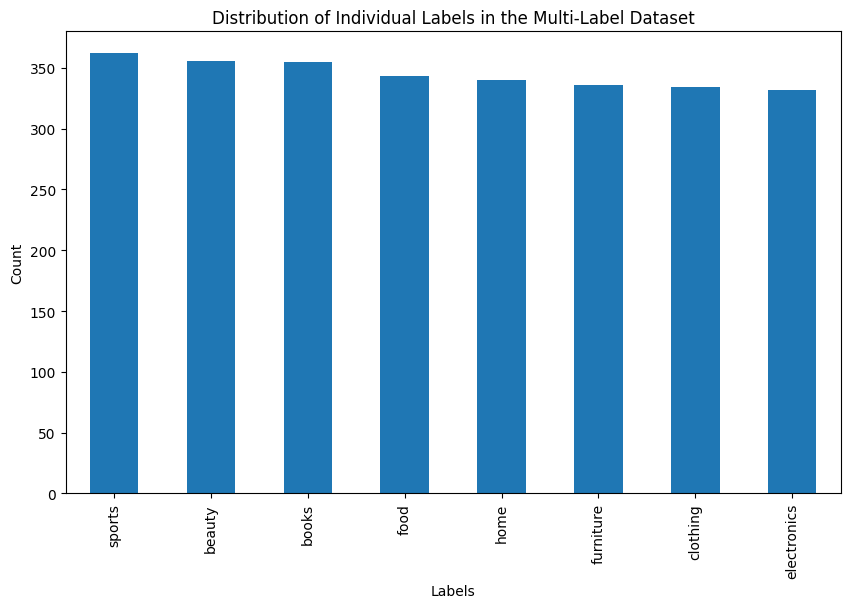

Missing values in the dataset:
 age                 0
gender              0
income              0
education           0
married             0
children            0
city                0
occupation          0
purchase_amount     0
most bought item    0
labels              0
dtype: int64


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, MultiLabelBinarizer

# Step 1: Load the dataset
file_path = "../../data/external/advertisement.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify loading
print("First few rows of the dataset:\n", df.head())

# 1. Describe the dataset using mean, standard deviation, min, and max values for numerical attributes
# Select only numerical columns for describing
numerical_columns = ['age', 'income', 'purchase_amount']
print("Dataset Description (Numerical Columns):\n", df[numerical_columns].describe())

# 2. Draw a graph showing the distribution of labels
# Assuming 'labels' is the target column with multi-label entries
# Split the 'labels' column into individual labels for counting
# Remove leading/trailing spaces and convert to lower case for consistency
df['labels'] = df['labels'].apply(lambda x: [label.strip().lower() for label in x.split()])

# Use MultiLabelBinarizer to transform labels into a binary format
mlb = MultiLabelBinarizer()
binary_labels = mlb.fit_transform(df['labels'])
binary_labels_df = pd.DataFrame(binary_labels, columns=mlb.classes_)

# print which label belongs to what binary column
print("Label to Binary Column Mapping:\n", mlb.classes_)
print("Binary Labels DataFrame:\n", binary_labels_df.head())


# Plot the distribution of each individual label across the dataset
plt.figure(figsize=(10, 6))
binary_labels_df.sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Individual Labels in the Multi-Label Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# 3. Handling missing values
# Check for missing values in the dataset
print("Missing values in the dataset:\n", df.isnull().sum())

# # Fill missing values with the mean for numerical columns and the mode for categorical columns
# for col in df.columns:
#     if df[col].dtype == 'object':  # Categorical column
#         df[col].fillna(df[col].mode()[0], inplace=True)
#     else:  # Numerical column
#         df[col].fillna(df[col].mean(), inplace=True)


In [37]:
# print the categorical columns
# Filter out categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns
categorical_data = df[categorical_columns]

# Display the categorical columns
print("Categorical Columns:\n", categorical_columns)
# print("\nCategorical Data (First 5 Rows):\n", categorical_data.head())

# 4. Normalization and standardization
# Encoding categorical variables before normalization and standardization
categorical_columns = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
# Use LabelEncoder for simplicity
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Normalize and standardize the data (excluding 'labels' and any other non-numeric columns)
features = df.drop(columns=['labels'])  # Assuming 'labels' is the multi-label target column

# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(features)
normalized_df = pd.DataFrame(normalized_data, columns=features.columns)
print("Normalized Data (First 5 Rows):\n", normalized_df.head())

# Standardization (Z-score)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)
standardized_df = pd.DataFrame(standardized_data, columns=features.columns)
print("Standardized Data (First 5 Rows):\n", standardized_df.head())

# Re-attach the binary multi-label columns to normalized and standardized dataframes
normalized_df = pd.concat([normalized_df, binary_labels_df], axis=1)
standardized_df = pd.concat([standardized_df, binary_labels_df], axis=1)

# Save processed dataframes if needed
# normalized_df.to_csv("../../data/interim/advertisement_normalized.csv", index=False)
# standardized_df.to_csv("../../data/interim/advertisement_standardized.csv", index=False)

Categorical Columns:
 Index(['gender', 'education', 'married', 'city', 'occupation',
       'most bought item', 'labels'],
      dtype='object')
Encoding used for each categorical attribute:
gender: ['ball' 'bat' 'bed' 'biscuits' 'carpet' 'chair' 'chips' 'cream' 'curtains'
 'dictionary' 'encyclopedia' 'gloves' 'laptop' 'lipstick' 'maggi' 'mobile'
 'monitor' 'novel' 'pants' 'perfume' 'shirt' 'shoes' 'sofa' 'table']
education: ['ball' 'bat' 'bed' 'biscuits' 'carpet' 'chair' 'chips' 'cream' 'curtains'
 'dictionary' 'encyclopedia' 'gloves' 'laptop' 'lipstick' 'maggi' 'mobile'
 'monitor' 'novel' 'pants' 'perfume' 'shirt' 'shoes' 'sofa' 'table']
married: ['ball' 'bat' 'bed' 'biscuits' 'carpet' 'chair' 'chips' 'cream' 'curtains'
 'dictionary' 'encyclopedia' 'gloves' 'laptop' 'lipstick' 'maggi' 'mobile'
 'monitor' 'novel' 'pants' 'perfume' 'shirt' 'shoes' 'sofa' 'table']
city: ['ball' 'bat' 'bed' 'biscuits' 'carpet' 'chair' 'chips' 'cream' 'curtains'
 'dictionary' 'encyclopedia' 'gloves' 'lapt

## Attribute wise metrics

In [38]:
import pandas as pd

# Step 1: Load the dataset
file_path = "../../data/external/advertisement.csv"
df = pd.read_csv(file_path)

# Step 2: Compute and display descriptive statistics for numerical attributes
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_stats = df[numerical_columns].describe().T
numerical_stats['std'] = df[numerical_columns].std()  # Include standard deviation
print("Numerical Attribute Statistics:\n", numerical_stats)

# Step 3: Compute and display descriptive statistics for categorical attributes
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
# categorical_stats = df[categorical_columns].agg(['count', 'nunique', 'mode']).T
# categorical_stats.columns = ['count', 'unique', 'mode']
# print("\nCategorical Attribute Statistics:\n", categorical_stats)

# Handle multi-label attribute ('labels')
if 'labels' in df.columns:
    df['labels'] = df['labels'].apply(lambda x: [label.strip() for label in x.split()])

    # Count frequency of each unique label in the multi-label column
    from collections import Counter
    label_counts = Counter([label for sublist in df['labels'] for label in sublist])
    
    print("\nMulti-Label Attribute ('labels') Frequency:\n", label_counts)


Numerical Attribute Statistics:
                   count          mean          std           min  \
age              1000.0     40.836000    13.786848     18.000000   
income           1000.0  49349.796167  9894.479148  21908.867759   
children         1000.0      1.508000     1.129253      0.000000   
purchase_amount  1000.0    101.098170    20.348736     23.482179   

                          25%           50%           75%           max  
age                 28.000000     41.000000     53.000000     64.000000  
income           42577.352034  48993.757137  56566.795992  79459.294416  
children             0.000000      1.000000      3.000000      3.000000  
purchase_amount     87.699577    101.587560    114.718926    168.978628  

Multi-Label Attribute ('labels') Frequency:
 Counter({'sports': 362, 'beauty': 356, 'books': 355, 'food': 343, 'home': 340, 'furniture': 336, 'clothing': 334, 'electronics': 332})


In [39]:
# print the number of cols
df = pd.read_csv(file_path)

print("Number of columns in the dataset:", len(df.columns))

Number of columns in the dataset: 11


# WINEQT

In [40]:
file_path = "../../data/external/WineQT.csv"

df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify loading
print("First few rows of the dataset:\n", df.head())

First few rows of the dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1 

In [41]:
# drop and store the quality column
quality = df['quality']
X = df.drop(columns=['quality'])

# std, mean, min, max
print("Dataset Description (Numerical Columns):\n", X.describe())

Dataset Description (Numerical Columns):
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min   

Unique values of 'quality': [5, 6, 7, 4, 8, 3]


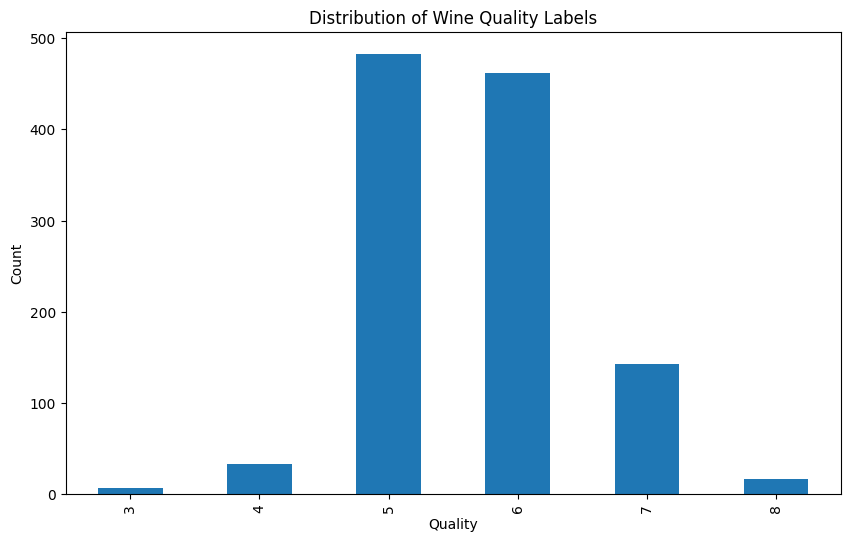

In [42]:
# show the unique values of quality
print("Unique values of 'quality':", quality.unique().tolist())

# plot the distribution of labels
plt.figure(figsize=(10, 6))
quality.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Wine Quality Labels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [43]:
# Normalize and standardize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)
normalized_df = pd.DataFrame(normalized_data, columns=X.columns)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
standardized_df = pd.DataFrame(standardized_data, columns=X.columns)

# Re-attach the 'quality' column to normalized and standardized dataframes
normalized_df['quality'] = quality
standardized_df['quality'] = quality

# df.head
print(normalized_df.head())
print(standardized_df.head())

# Save processed dataframes if needed
# normalized_df.to_csv("../../data/interim/wine_normalized.csv", index=False)
# standardized_df.to_csv("../../data/interim/wine_standardized.csv", index=False)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol        Id  quality  
0  0.153846  0.000000  


# Boston Housing

In [44]:
# Step 1: Load the dataset
file_path = "../../data/external/HousingData.csv"

data = pd.read_csv(file_path)

# Describe the dataset
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [45]:
# Check missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Fill missing values with the mean of each column
data_filled = data.fillna(data.mean())

print(data_filled.describe())

Missing Values per Column:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.921051    6.699165    0.250233    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.290250    0.000000    9.900000    0.000000    0.538000    6.208500   
75%      3.611874   11.211934   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS    

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler
scaler = MinMaxScaler()

# Normalizing the dataset
data_normalized = pd.DataFrame(scaler.fit_transform(data_filled), columns=data_filled.columns)

# Display first few rows of the normalized data
print(data_normalized.head())

# Save the normalized data to a new CSV file
data_normalized.to_csv("../../data/interim/HousingData_Normalized.csv", index=False)


       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.303130  0.693333  


In [47]:
from sklearn.preprocessing import StandardScaler

# Initializing the scaler
scaler_standard = StandardScaler()

# Standardizing the dataset
data_standardized = pd.DataFrame(scaler_standard.fit_transform(data_filled), columns=data_filled.columns)

# Display first few rows of the standardized data
print(data_standardized.head())

# Save the processed data standardization
data_standardized.to_csv("../../data/interim/HousingData_standardized.csv", index=False)



       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.422328  0.296443 -1.311010 -0.279851 -0.144217  0.413672 -0.121059   
1 -0.419870 -0.489639 -0.599771 -0.279851 -0.740262  0.194274  0.378716   
2 -0.419872 -0.489639 -0.599771 -0.279851 -0.740262  1.282714 -0.270627   
3 -0.419277 -0.489639 -1.330435 -0.279851 -0.835284  1.016303 -0.828770   
4 -0.414981 -0.489639 -1.330435 -0.279851 -0.835284  1.228577 -0.522338   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.104146  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.510353 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.239748  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.395333  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052  0.000000  1.487503  


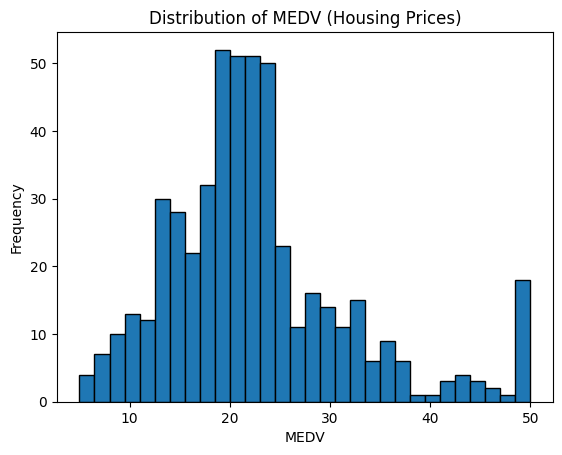

In [48]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable 'MEDV'
plt.hist(data_filled['MEDV'], bins=30, edgecolor='black')
plt.title('Distribution of MEDV (Housing Prices)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()


# DiabeTities

In [49]:
# Step 1: Load the dataset
file_path = "../../data/external/diabetes.csv"

df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify loading
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [50]:
import numpy as np

# describe the dataset
df.describe()

# replace 0 values with NaN in columns ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

# fill the NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Display the first few rows of the filled dataset
print(df_filled.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


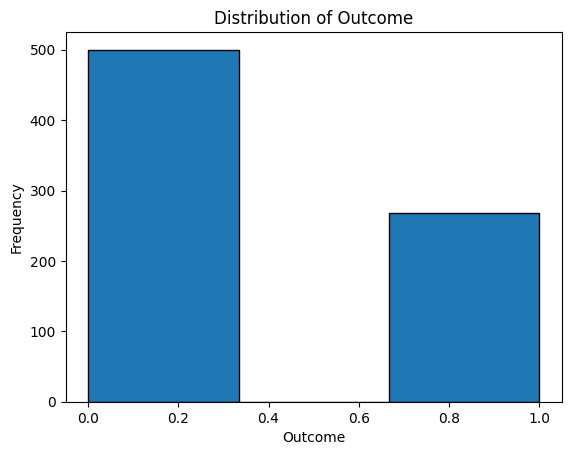

In [51]:
# plot the distribution of the target variable 'Outcome'
plt.hist(df_filled['Outcome'], bins=3, edgecolor='black')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()


In [52]:
# standardize the data
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df_filled.columns)

# normalize the data
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df_filled.columns)

# display the first few rows of the standardized and normalized data
print(data_standardized.head())
print(data_normalized.head())

# save the processed data
# data_standardized.to_csv("../../data/interim/diabetes_standardized.csv", index=False)
# data_normalized.to_csv("../../data/interim/diabetes_normalized.csv", index=False)


   Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4    -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age   Outcome  
0  0.166292                  0.468492  1.425995  1.365896  
1 -0.852531                 -0.365061 -0.190672 -0.732120  
2 -1.332833                  0.604397 -0.105584  1.365896  
3 -0.634212                 -0.920763 -1.041549 -0.732120  
4  1.548980                  5.484909 -0.020496  1.365896  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239